In [1]:
#Load libraries

import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import shap
import lime
import lime.lime_tabular
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.svm import SVC
#print('done')

In [2]:
#Load income dataset
df = pd.read_csv('D:/SDU/thesisCodes/data/datasets_180_408_data.csv') #

def impute_radius(cols):
    radius = cols[0]
    diagnosis = cols[1]
    
    # if value in radius column is null
    if pd.isnull(radius):
        
        # if woman is diagnosed with breast cancer
        if diagnosis == 1:
            return 17
        # if woman was not diagnosed with breast cancer
        else:
            return 12
    # when value in radius column is not null
    else:
        # return that same value
        return radius
    
df['radius_mean'] = df[['radius_mean', 'diagnosis']].apply(impute_radius, axis = 1)

df.drop(['id'], axis = 1, inplace = True)
df['diagnosis'] = [1 if x == 'M' else 0 for x in df['diagnosis']]


In [3]:
#df.info()
df.drop(['Unnamed: 32'], axis = 1, inplace = True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [4]:
X = df.drop('diagnosis', axis = 1)
Y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42)

In [5]:
#Build the random forest classifier
rf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)

yPredRf = rf.predict(X_test)
print(metrics.classification_report(Y_test, yPredRf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



Text(0, 0.5, 'Cross-validated accuracy')

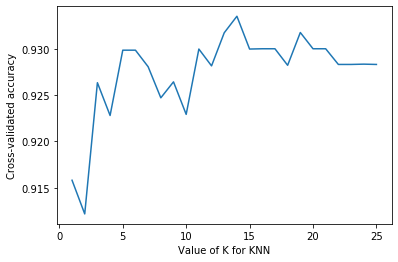

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # It’s 10 fold cross validation with ‘accuracy’ scoring 
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
    
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [7]:
#Train the model and predict for K=14
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, Y_train)
yPredKNN = knn.predict(X_test)

#classification report for test set
print(metrics.classification_report(Y_test, yPredKNN))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [8]:
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

yPredGNB = gnb.predict(X_test)

#classification report for test set
print(metrics.classification_report(Y_test, yPredGNB))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [9]:
xgbModel = xgb.XGBClassifier(random_state=1)
xgbModel.fit(X_train, Y_train)
yPredXGB = xgbModel.predict(X_test)
print(metrics.classification_report(Y_test, yPredXGB))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        89
           1       0.96      0.94      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [10]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)

yPredSVM = svclassifier.predict(X_test)
print(metrics.classification_report(Y_test, yPredSVM))

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


              precision    recall  f1-score   support

           0       0.62      1.00      0.77        89
           1       0.00      0.00      0.00        54

    accuracy                           0.62       143
   macro avg       0.31      0.50      0.38       143
weighted avg       0.39      0.62      0.48       143



In [11]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

yPredSVM = svclassifier.predict(X_test)
print(metrics.classification_report(Y_test, yPredSVM))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [12]:
#Importing the module
from eli5 import show_weights, show_prediction
from eli5.sklearn import PermutationImportance

In [13]:
#Permutation Importance
print("Permutation importance RF")
perm1 = PermutationImportance(rf, scoring = 'accuracy' ,random_state=101).fit(X_test, Y_test)
show_weights(perm1, feature_names = list(X_test.columns))

Permutation importance RF


Weight,Feature
0.0182 ± 0.0244,radius_worst
0.0154 ± 0.0137,texture_mean
0.0140 ± 0.0153,concave points_worst
0.0084 ± 0.0137,concavity_mean
0.0042 ± 0.0069,area_worst
0.0042 ± 0.0112,texture_worst
0.0028 ± 0.0069,radius_mean
0.0028 ± 0.0069,concavity_worst
0.0014 ± 0.0056,compactness_mean
0 ± 0.0000,smoothness_mean


In [14]:
#Permutation Importance
print("Permutation importance KNN")
perm1 = PermutationImportance(knn, scoring = 'accuracy' ,random_state=101).fit(X_test, Y_test)
show_weights(perm1, feature_names = list(X_test.columns))

Permutation importance KNN


Weight,Feature
0.4615 ± 0.0696,area_worst
0.0517 ± 0.0069,area_mean
0.0042 ± 0.0069,area_se
0.0028 ± 0.0069,perimeter_worst
0.0028 ± 0.0069,perimeter_mean
0 ± 0.0000,concave points_worst
0 ± 0.0000,smoothness_mean
0 ± 0.0000,compactness_mean
0 ± 0.0000,concavity_mean
0 ± 0.0000,concave points_mean


In [15]:
#Permutation Importance
print("Permutation importance XGB")
perm1 = PermutationImportance(xgbModel, scoring = 'accuracy' ,random_state=101).fit(X_test, Y_test)
show_weights(perm1, feature_names = list(X_test.columns))

Permutation importance XGB


Weight,Feature
0.0168 ± 0.0190,texture_mean
0.0112 ± 0.0112,area_worst
0.0070 ± 0.0198,concave points_worst
0.0070 ± 0.0319,texture_worst
0.0056 ± 0.0056,area_se
0.0056 ± 0.0056,radius_worst
0.0028 ± 0.0069,perimeter_se
0.0028 ± 0.0069,compactness_se
0.0000 ± 0.0088,area_mean
0 ± 0.0000,fractal_dimension_mean


In [16]:
#Permutation Importance
print("Permutation importance GNB")
perm1 = PermutationImportance(gnb, scoring = 'accuracy' ,random_state=101).fit(X_test, Y_test)
show_weights(perm1, feature_names = list(X_test.columns))

Permutation importance GNB


Weight,Feature
0.0657 ± 0.0301,area_se
0.0643 ± 0.0285,area_worst
0.0252 ± 0.0190,radius_worst
0.0238 ± 0.0288,perimeter_se
0.0210 ± 0.0250,perimeter_worst
0.0168 ± 0.0209,area_mean
0.0168 ± 0.0112,perimeter_mean
0.0126 ± 0.0163,radius_se
0.0112 ± 0.0143,compactness_worst
0.0112 ± 0.0069,texture_worst


In [17]:
#Permutation Importance
print("Permutation importance SVM")
perm1 = PermutationImportance(svclassifier, scoring = 'accuracy' ,random_state=101).fit(X_test, Y_test)
show_weights(perm1, feature_names = list(X_test.columns))

Permutation importance SVM


Weight,Feature
0.4517 ± 0.0874,perimeter_mean
0.2937 ± 0.0791,area_se
0.1469 ± 0.0265,texture_worst
0.1021 ± 0.0505,radius_worst
0.0979 ± 0.0606,radius_mean
0.0224 ± 0.0336,texture_mean
0.0126 ± 0.0163,texture_se
0.0070 ± 0.0386,area_mean
0.0056 ± 0.0271,area_worst
0.0028 ± 0.0143,concavity_worst


In [18]:
show_prediction(rf, X_test.iloc[1], show_feature_values=True)

In [19]:
show_prediction(xgbModel, X_test.iloc[1], show_feature_values=True)

In [20]:
#Prepare Y_test for Manifold
Y_testMf = Y_test.to_frame()
Y_testMf = Y_testMf.replace(0, 'False')
Y_testMf = Y_testMf.replace(1, 'True')
Y_testMf = Y_testMf.values.tolist()

Y_testMfFlat = []
for sublist in Y_testMf:
    for item in sublist:
        Y_testMfFlat.append(item)

In [21]:
#Prepare RF dataset for Manifold
yPredRFpp = rf.predict_proba(X_test)

yPredRFpp0 = yPredRFpp[:,0]
yPredRFpp1 = yPredRFpp[:,1]

yPredRFpp0 = yPredRFpp0.tolist()
yPredRFpp1 = yPredRFpp1.tolist()

yPredRFppFinal = [{'True': f, 'False': c} for f, c in zip(yPredRFpp1, yPredRFpp0)]


#Prepare GNB dataset for Manifold
yPredGNBpp = gnb.predict_proba(X_test)

yPredGNBpp0 = yPredGNBpp[:,0]
yPredGNBpp1 = yPredGNBpp[:,1]

yPredGNBpp0 = yPredGNBpp0.tolist()
yPredGNBpp1 = yPredGNBpp1.tolist()

yPredGNBppFinal = [{'True': f, 'False': c} for f, c in zip(yPredGNBpp1, yPredGNBpp0)]


#Prepare KNN dataset for Manifold
yPredKNNpp = knn.predict_proba(X_test)

yPredKNNpp0 = yPredKNNpp[:,0]
yPredKNNpp1 = yPredKNNpp[:,1]

yPredKNNpp0 = yPredKNNpp0.tolist()
yPredKNNpp1 = yPredKNNpp1.tolist()

yPredKNNppFinal = [{'True': f, 'False': c} for f, c in zip(yPredKNNpp1, yPredKNNpp0)]


#Prepare XGB dataset for Manifold
yPredXGBpp = xgbModel.predict_proba(X_test)
yPredXGBpp = yPredXGBpp.astype(np.float64)

yPredXGBpp0 = yPredXGBpp[:,0]
yPredXGBpp1 = yPredXGBpp[:,1]

yPredXGBpp0 = yPredXGBpp0.tolist()
yPredXGBpp0 = yPredXGBpp1.tolist()

yPredXGBppFinal = [{'True': f, 'False': c} for f, c in zip(yPredXGBpp1, yPredXGBpp0)]


In [22]:
type(yPredXGBpp[0][1])
#yPredRf[1]

numpy.float64

In [23]:
allModels = []
allModels.append(yPredGNBppFinal)
allModels.append(yPredRFppFinal)
allModels.append(yPredKNNppFinal)
allModels.append(yPredXGBppFinal)

In [24]:
from mlvis import Manifold
Manifold(props={'data': {
    'x': X_test,
    'yPred': allModels,
    'yTrue': Y_testMfFlat
}})

Manifold(props='{"data": {"x": [{"radius_mean": 12.47, "texture_mean": 18.6, "perimeter_mean": 81.09, "area_me…